# YouTube trending videos

In [22]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

## Wczytanie danych

In [40]:
gb_videos = pd.read_csv(os.path.join("youtube_data", "GB_videos_5p.csv"), sep=";")
us_videos = pd.read_csv(os.path.join("youtube_data", "US_videos_5p.csv"), sep=";")
videos = pd.concat([gb_videos, us_videos])

videos.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,NaN,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,NaN,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,NaN,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,NaN,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,NaN,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,NaN,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...
6,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,NaN,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
7,#NAZWA?,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,NaN,2017-11-10T19:19:43.000Z,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...
8,LMCuKltaY3M,17.14.11,Elbow - Golden Slumbers (John Lewis Advert 2017),ElbowVEVO,NaN,2017-11-10T08:00:01.000Z,"Elbow|""Golden""|""Slumbers""|""Polydor""|""Alternative""",154494,2163,147,211,https://i.ytimg.com/vi/LMCuKltaY3M/default.jpg,False,False,False,"“Golden Slumbers”, originally by The Beatles, ..."
9,9t9u_yPEidY,17.14.11,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",JenniferLopezVEVO,NaN,2017-11-10T15:00:00.000Z,"Jennifer Lopez ft. Wisin|""Jennifer Lopez ft. W...",9548677,190084,15015,11473,https://i.ytimg.com/vi/9t9u_yPEidY/default.jpg,False,False,False,"Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O..."


In [32]:
import numpy as np
# TAGS PREPROCESSING
videos = videos.rename(columns={"description ":"description"})
videos["tags"] = videos["tags"].str.replace('"', "")
tags = videos["tags"].str.split("|").apply(pd.Series, 1).stack()
tags.index = tags.index.droplevel(-1)
tags.name = "tags"
tags = tags.to_frame()
unique_tags = tags["tags"].value_counts() #.groupby(by="tags", as_inde
# x=False).agg({"tags": pd.Series.nunique})
unique_tags = unique_tags.rename_axis("tag").reset_index(name="count")
unique_tags.describe()

,count
count,72466.000000
mean,20.769423
std,66.390236
min,1.000000
25%,5.000000
50%,9.000000
75%,18.000000
max,6232.000000


              tag  count
0           funny   6232
1          comedy   5253
2           music   3274
3             Pop   2836
4            2018   2658
5           humor   2257
6           video   2079
7          how to   2008
8       interview   1969
9            vlog   1887
10           live   1873
11       official   1796
12        Records   1784
13      celebrity   1763
14    music video   1716
15       comedian   1681
16        trailer   1651
17         review   1615
18          movie   1601
19           news   1601
20    celebrities   1513
21           food   1506
22        Trailer   1486
23         makeup   1472
24     television   1463
25           2017   1430
26      hollywood   1401
27     late night   1376
28    funny video   1355
29         Comedy   1314
30          jokes   1304
31        science   1298
32            NBC   1248
33  entertainment   1246
34         beauty   1225
35            new   1221
36       tutorial   1193
37          Music   1193
38            Rap   1192


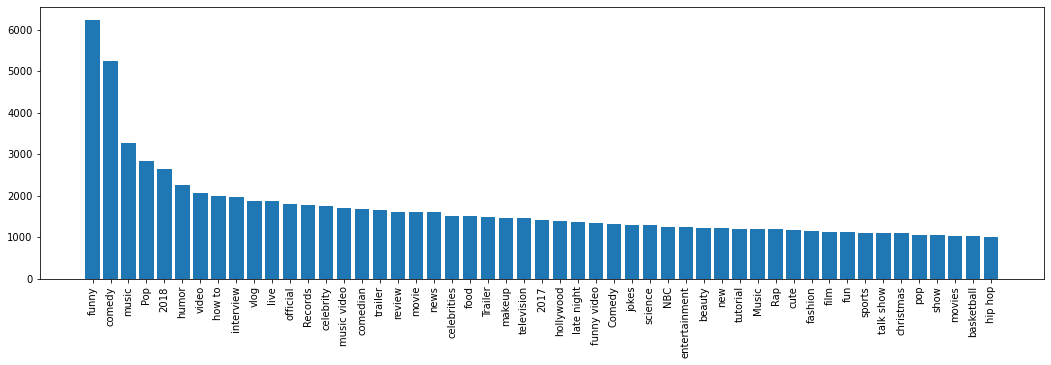

In [39]:
print(unique_tags)
unique_tags = unique_tags[unique_tags["count"] > 1000]
plt.subplots(figsize=(18,5))
plt.bar(unique_tags["tag"], unique_tags["count"])
plt.xticks(rotation=90)
plt.show()

# plt.bar()
# plt.show()

# gb_videos.head(20)

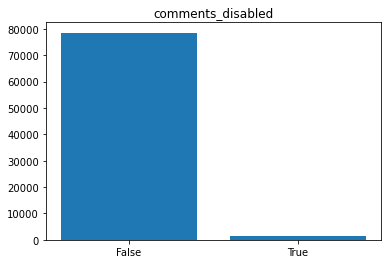

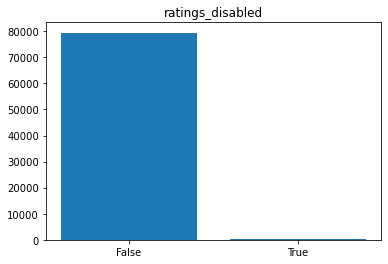

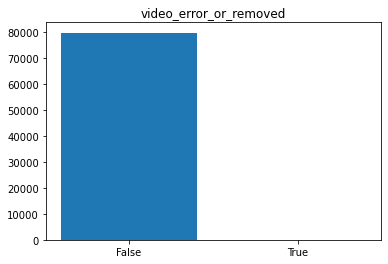

In [46]:
bool_attrs = ["comments_disabled", "ratings_disabled", "video_error_or_removed"]
for attr in bool_attrs:
    attr_c = videos[attr].value_counts()
    attr_c = attr_c.rename_axis(attr).reset_index(name="count")
    plt.title(attr)
    plt.bar(["False", "True"], attr_c["count"])
    plt.show()

In [30]:
videos.describe()

,category_id,views,likes,dislikes,comment_count
count,3932.000000,7.986500e+04,7.986500e+04,7.986500e+04,7.986500e+04
mean,18.459563,4.091166e+06,1.036262e+05,5.612328e+03,1.070850e+04
std,7.740292,1.439125e+07,2.957265e+05,4.124462e+04,4.443679e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,2.464170e+05,5.642000e+03,2.010000e+02,6.420000e+02
50%,22.000000,7.961060e+05,2.092200e+04,7.120000e+02,2.099000e+03
75%,24.000000,2.535704e+06,7.824800e+04,2.527000e+03,7.220000e+03
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


## Etap 1 - Atrybuty tekstowe

0        Click here to continue the story and make your...
1        Musical guest Taylor Swift performs …Ready for...
2        Eminem's new track Walk on Water ft. Beyoncé i...
3        Salford drew 4-4 against the Class of 92 and F...
4        Dashcam captures truck's near miss with child ...
                               ...                        
40944       The Cat Who Caught the Laser - Aaron's Animals
40945                                                  NaN
40946    I had so much fun transforming Safiyas hair in...
40947    How Black Panther Should Have EndedWatch More ...
40948    Call of Duty: Black Ops 4 Multiplayer raises t...
Name: description, Length: 79865, dtype: object
video_id                   object
trending_date              object
title                      object
channel_title              object
category_id               float64
publish_time               object
tags                       object
views                       int64
likes                       int

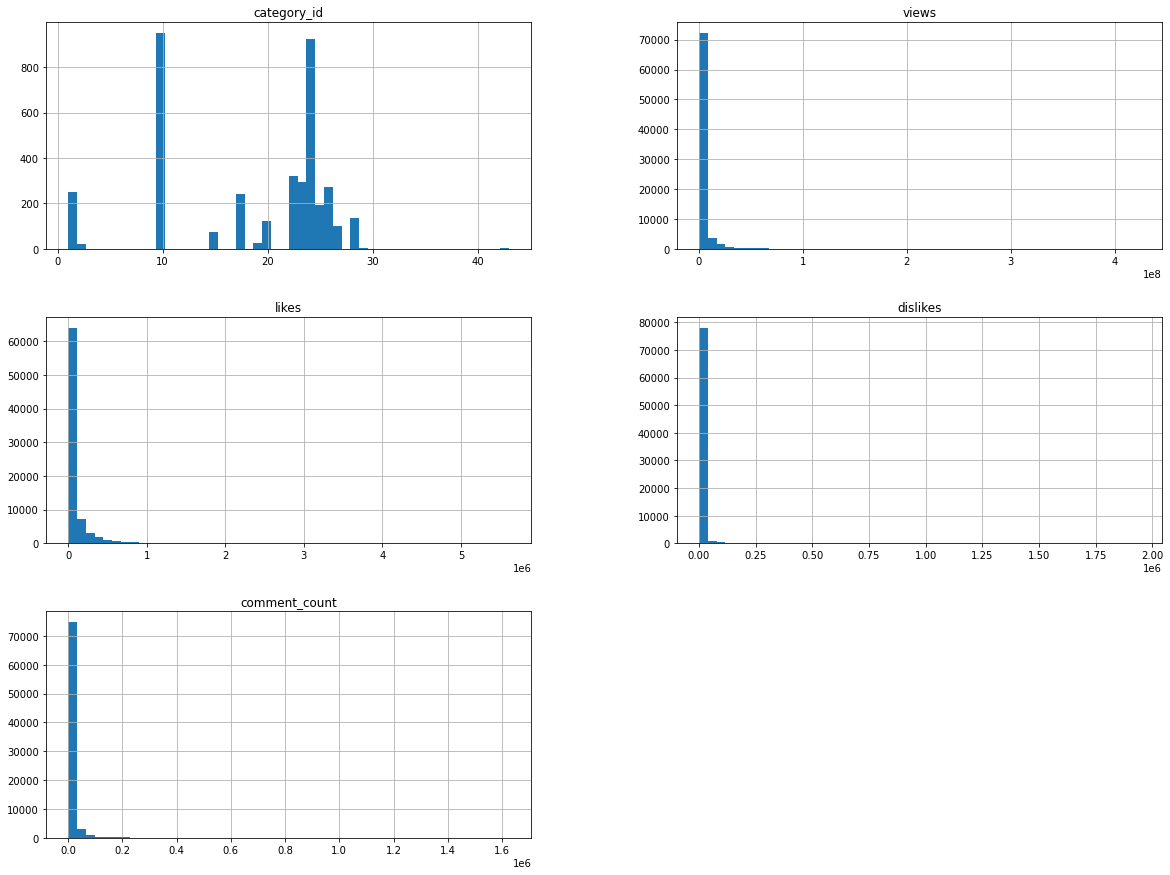

In [28]:
string_attributes = ["video_id", "title", "channel_title", "tags",
                     "thumbnail_link", "description"]

# TODO preprocess description
# TODO preprocess title
print(videos["description"])


videos.hist(bins = 50, figsize=(20, 15))
plt.show()
#
# gb_videos.plot.bar(subplots=True)
# plt.show()

# TODO most frequent words in titles
# TODO most frequent words in descriptions


Video_id - słaby atrybut, ponieważ jest to tylko id generowane, nie wności żadniej wiedzy

Thumbnail link też słaby (jako sam tekst) - tylko link do obrazka, ale obrazek może wnieśc więcej wiedzy

Boolowskie zmienne słaby atrybut bo w większości true.